In [53]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

In [31]:
chexpert_df = pd.read_csv('/content/chexpert_df_multiclass.csv', index_col = 0)
nih_df = pd.read_csv('/content/nih_df_multiclass.csv', index_col = 0)
vinbigdata_df = pd.read_csv('/content/vinbigdata_df_multiclass.csv', 
                            index_col = 0)

In [32]:
chexpert_df.rename(columns = {'Lung Opacity': 'Opacity', 
                              'Pleural Effusion': 'Effusion'}, inplace = True)

nodule, mass = list(nih_df['Nodule']), list(nih_df['Mass'])
nih_df['Nodule/Mass'] = nodule or mass
nih_df = nih_df.drop(['Nodule', 'Mass'], axis = 1)

vinbigdata_df.rename(columns = {'Lung Opacity': 'Opacity', 
                                'Pleural effusion': 'Effusion', 
                                'No finding': 'No Finding'},
                      inplace = True)

In [33]:
columns = ['Dataset', 'Path', 'Sex', 'Label Type', 'No Finding', 'Opacity', 
           'Atelectasis', 'Pneumothorax', 'Effusion', 'Nodule/Mass']

chexpert_df['Nodule/Mass'] = [0.0] * len(chexpert_df)
nih_df['Opacity'] = [0.0] * len(nih_df)

chexpert_df = chexpert_df[columns]
nih_df = nih_df[columns]
vinbigdata_df = vinbigdata_df[columns]

all_datasets = pd.concat((chexpert_df, nih_df, vinbigdata_df))

Text(0, 0.5, 'Imagens')

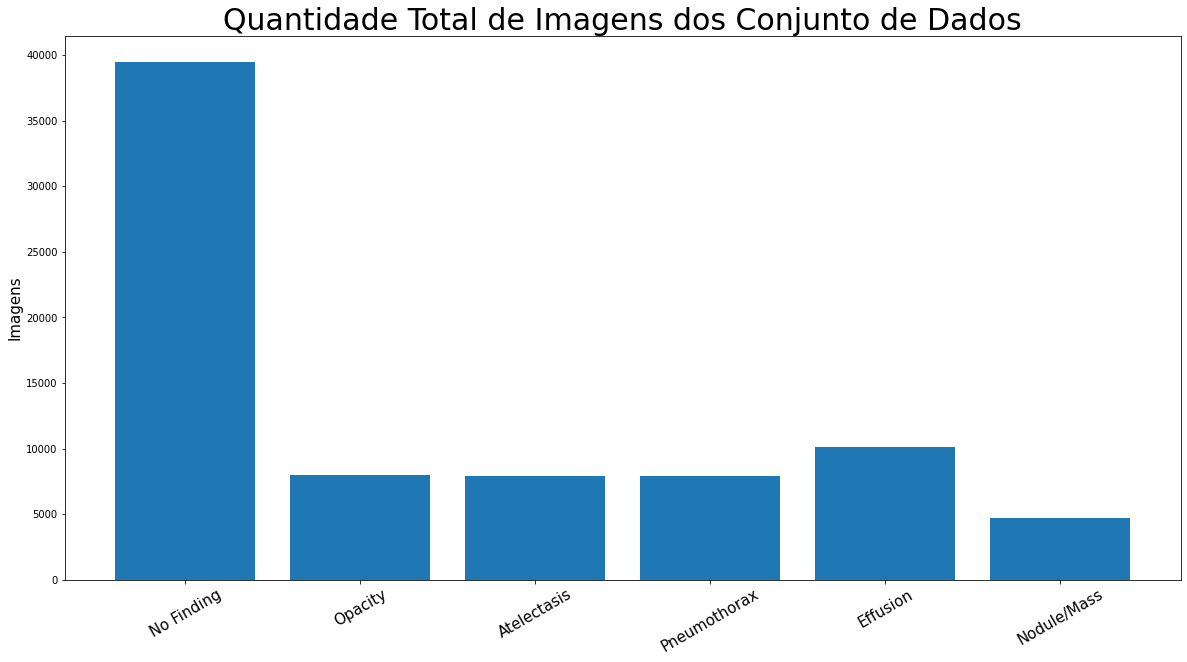

In [35]:
count_findings = list()
for finding in columns[4:]:
  count = list(all_datasets[finding].value_counts())[1]
  count_findings.append(count)

plt.figure(figsize = (20, 10))
plt.bar(columns[4:], count_findings)
plt.xticks(rotation = 30, size = 15)
plt.title('Quantidade Total de Imagens dos Conjunto de Dados', size = 30)
plt.ylabel('Imagens', size = 15)

In [40]:
classes = columns[4:]
min_classe = min(count_findings)
sub_datasets = list()
for index, finding in enumerate(classes):
  sub_datasets.append(all_datasets[all_datasets[finding] == 1])
  sub_datasets[index] = sub_datasets[index].sample(n = min_classe)

for index, sub in enumerate(sub_datasets):
  if index == 0:
    all_datasets_balanced = sub
  elif index != len(sub_datasets):
    all_datasets_balanced = pd.concat((all_datasets_balanced, sub))

Text(0, 0.5, 'Imagens')

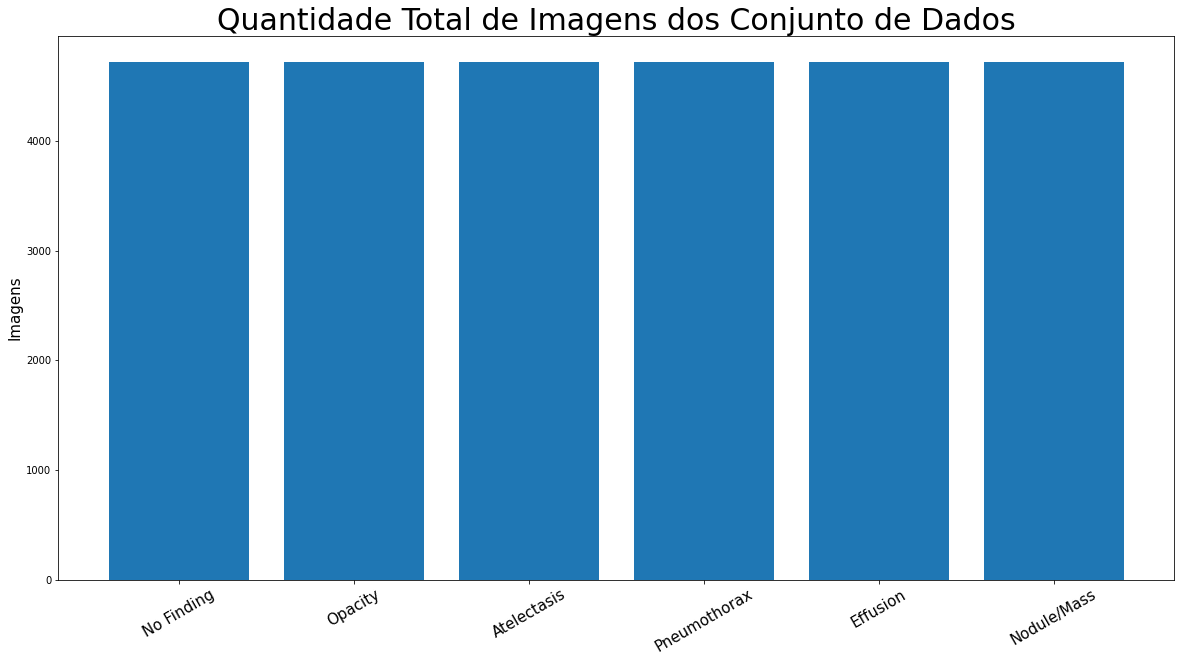

In [41]:
count_findings = list()
for finding in columns[4:]:
  count = list(all_datasets_balanced[finding].value_counts())[1]
  count_findings.append(count)

plt.figure(figsize = (20, 10))
plt.bar(columns[4:], count_findings)
plt.xticks(rotation = 30, size = 15)
plt.title('Quantidade Total de Imagens dos Conjunto de Dados', size = 30)
plt.ylabel('Imagens', size = 15)

In [43]:
all_datasets.to_csv(path_or_buf = 'all_datasets.csv', columns = columns)
all_datasets_balanced.to_csv(path_or_buf = 'all_datasets_balanced.csv', 
                             columns = columns)

In [56]:
classes_abnormal = classes[1:]
finding_train, finding_val, finding_test = [], [], []
for classe in classes_abnormal:
  finding = all_datasets_balanced[all_datasets_balanced[classe] == 1]
  f_train, f_val = train_test_split(finding, test_size = 0.2,
                                    random_state = 42, 
                                    stratify = finding[classe])
  f_val, f_test = train_test_split(f_val, test_size = 0.5, random_state = 42,
                                   stratify = f_val[classe])
  finding_train.append(f_train)
  finding_val.append(f_val)
  finding_test.append(f_test)

for index in range(0, len(finding_train)):
  if index == 0:
    train = finding_train[index]
    val = finding_val[index]
    test = finding_test[index]
  elif index != len(finding_train):
    train = pd.concat((train, finding_train[index]))
    val = pd.concat((val, finding_val[index]))
    test = pd.concat((test, finding_test[index]))

Text(0, 0.5, 'Imagens')

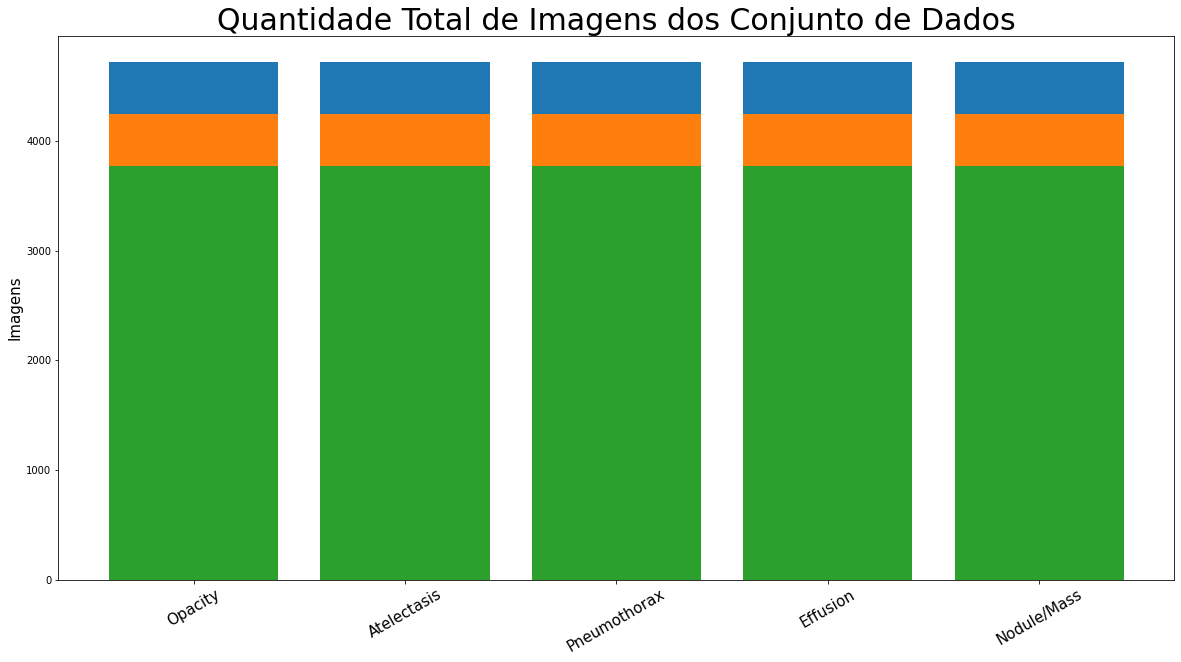

In [66]:
count_train, count_val, count_test = [], [], []
for finding in columns[5:]:
  c_train = list(train[finding].value_counts())[1]
  c_val = list(val[finding].value_counts())[1]
  c_test = list(test[finding].value_counts())[1]
  count_train.append(c_train), count_val.append(c_val), count_test.append(c_test)

plt.figure(figsize = (20, 10))
plt.bar(columns[5:], c_train + c_val + c_test)
plt.bar(columns[5:], c_train + c_val)
plt.bar(columns[5:], c_train)
plt.xticks(rotation = 30, size = 15)
plt.title('Quantidade Total de Imagens dos Conjunto de Dados', size = 30)
plt.ylabel('Imagens', size = 15)

In [67]:
train.to_csv(path_or_buf = 'train.csv', columns = columns)
test.to_csv(path_or_buf = 'test.csv', columns = columns)
val.to_csv(path_or_buf = 'val.csv', columns = columns)